In [1]:
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp

# Figures aesthetics
sc.set_figure_params(dpi=150)

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())
sns.set_style("ticks")

g2m_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/G2M_phase.txt", names=["gene"]).gene)
g2m_genes = [gene[0].upper() + gene[1:].lower() for gene in g2m_genes]

s_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/S_phase.txt", names=["gene"]).gene)
s_genes = [gene[0].upper() + gene[1:].lower() for gene in s_genes]

In [2]:
adata_counts = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/reference_E13.h5ad")
adata_annotated = sc.read_h5ad(f"{DATA_PATH}/anndatas/reference_integrations_E13.h5ad")
adata = adata_counts[~adata_annotated.obs.celltype_l0.isin(["neurons + glia", "mesenchyma"])]

In [4]:
for location in ["face", "trunk"]:
    adata_tmp = adata[adata.obs.location == location]
    prepare_embedding(adata_tmp, f"other_cells_{location}_E13")

Harmony integration with harmonypy is preforming.


2023-02-10 09:53:18,754 - harmonypy - INFO - Iteration 1 of 30
2023-02-10 09:53:19,689 - harmonypy - INFO - Iteration 2 of 30
2023-02-10 09:53:20,579 - harmonypy - INFO - Iteration 3 of 30
2023-02-10 09:53:21,479 - harmonypy - INFO - Iteration 4 of 30
2023-02-10 09:53:22,006 - harmonypy - INFO - Iteration 5 of 30
2023-02-10 09:53:22,485 - harmonypy - INFO - Iteration 6 of 30
2023-02-10 09:53:22,909 - harmonypy - INFO - Iteration 7 of 30
2023-02-10 09:53:23,517 - harmonypy - INFO - Converged after 7 iterations
2023-02-10 09:53:29.958011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 09:53:30.111004: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register fact

Harmony integration with harmonypy is preforming.


2023-02-10 09:54:23,231 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2023-02-10 09:54:26,886 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2023-02-10 09:54:30,710 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2023-02-10 09:54:34,333 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2023-02-10 09:54:37,958 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2023-02-10 09:54:41,284 - harmonypy - INFO - Iteration 6 of 30
INFO:harmonypy:Iteration 6 of 30
2023-02-10 09:54:43,680 - harmonypy - INFO - Iteration 7 of 30
INFO:harmonypy:Iteration 7 of 30
2023-02-10 09:54:45,978 - harmonypy - INFO - Converged after 7 iterations
INFO:harmonypy:Converged after 7 iterations


## Trunk

In [2]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/other_cells_trunk_E13_reference.h5ad")

In [3]:
ct = pd.read_csv("Cell_type_tables/trunk_other.tsv", sep="\t", names=["leiden", "ct3", "ct2"])
ct.leiden = ct.leiden.astype(str)
ct2_dict = dict(zip(ct.leiden, ct.ct2))
ct3_dict = dict(zip(ct.leiden, ct.ct3))

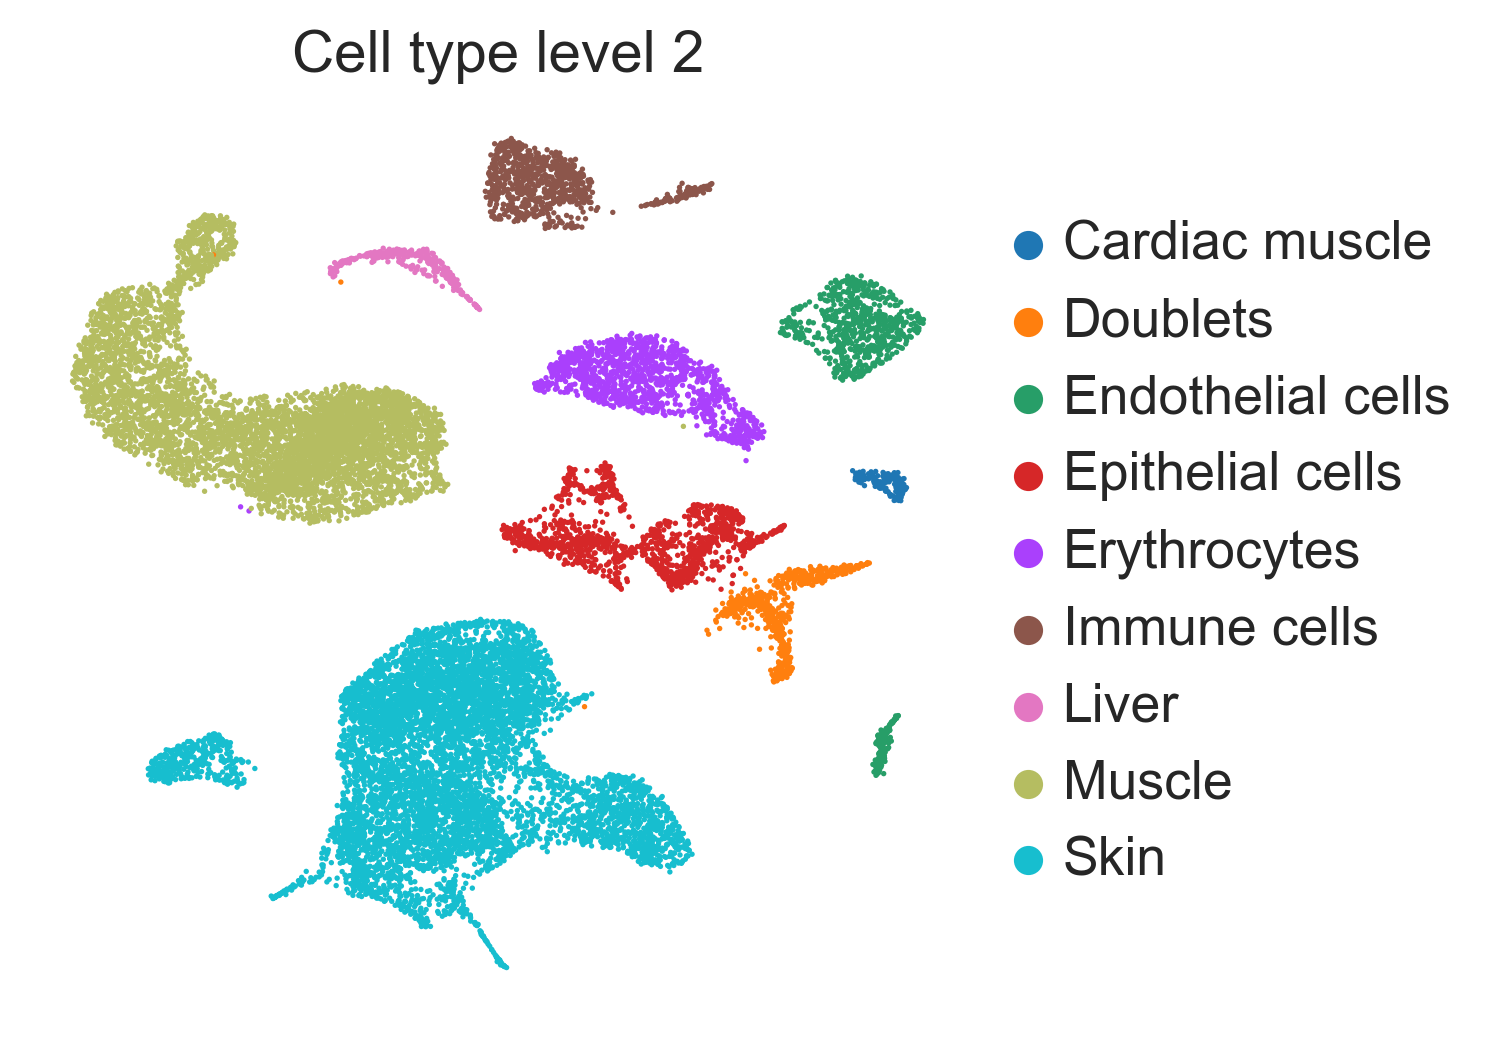

In [4]:
adata.obs["celltype_l2"] = [ct2_dict[leiden] for leiden in adata.obs["leiden_0.5"]]
sc.pl.umap(adata, color="celltype_l2", title="Cell type level 2", frameon=False)

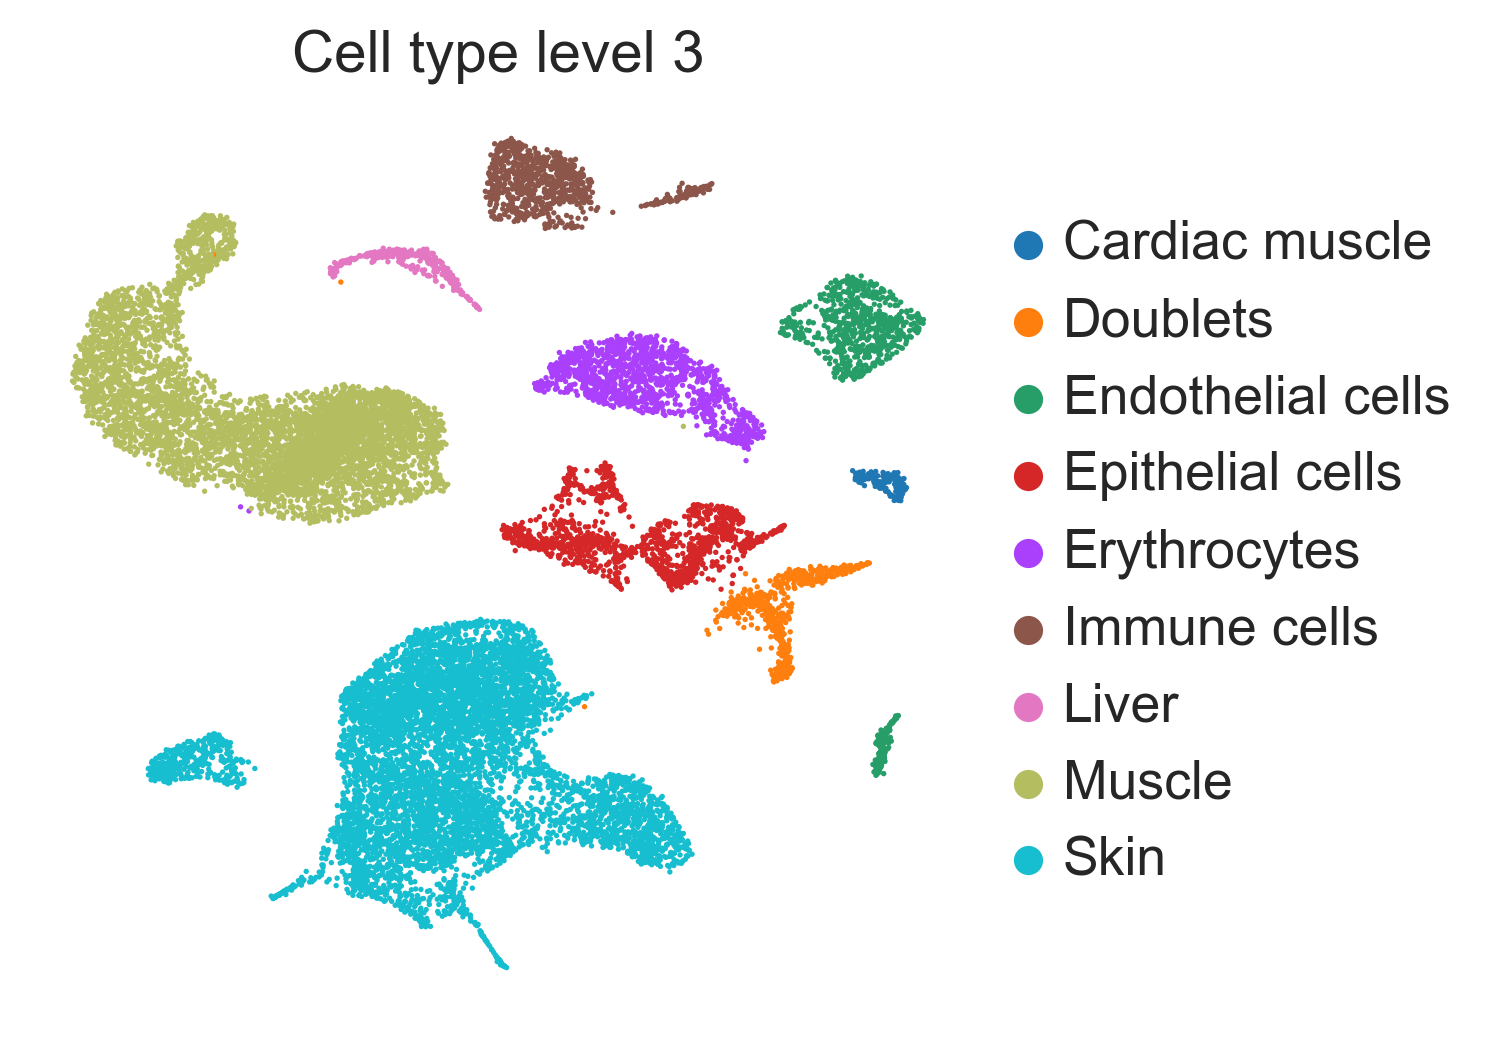

In [5]:
adata.obs["celltype_l3"] = [ct2_dict[leiden] for leiden in adata.obs["leiden_0.5"]]
sc.pl.umap(adata, color="celltype_l3", title="Cell type level 3", frameon=False)

In [6]:
adata.raw.to_adata().write_h5ad(f"{DATA_PATH}/cellxgene/other_cells_trunk_E13.h5ad")
adata.write_h5ad(f"{DATA_PATH}/anndatas/other_cells_trunk_E13_reference.h5ad")

## Face

In [7]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/other_cells_face_E13_reference.h5ad")

In [8]:
ct = pd.read_csv("Cell_type_tables/cranial_other.tsv", sep="\t", names=["leiden", "ct3", "ct2"])
ct.leiden = ct.leiden.astype(str)
ct2_dict = dict(zip(ct.leiden, ct.ct2))
ct3_dict = dict(zip(ct.leiden, ct.ct3))

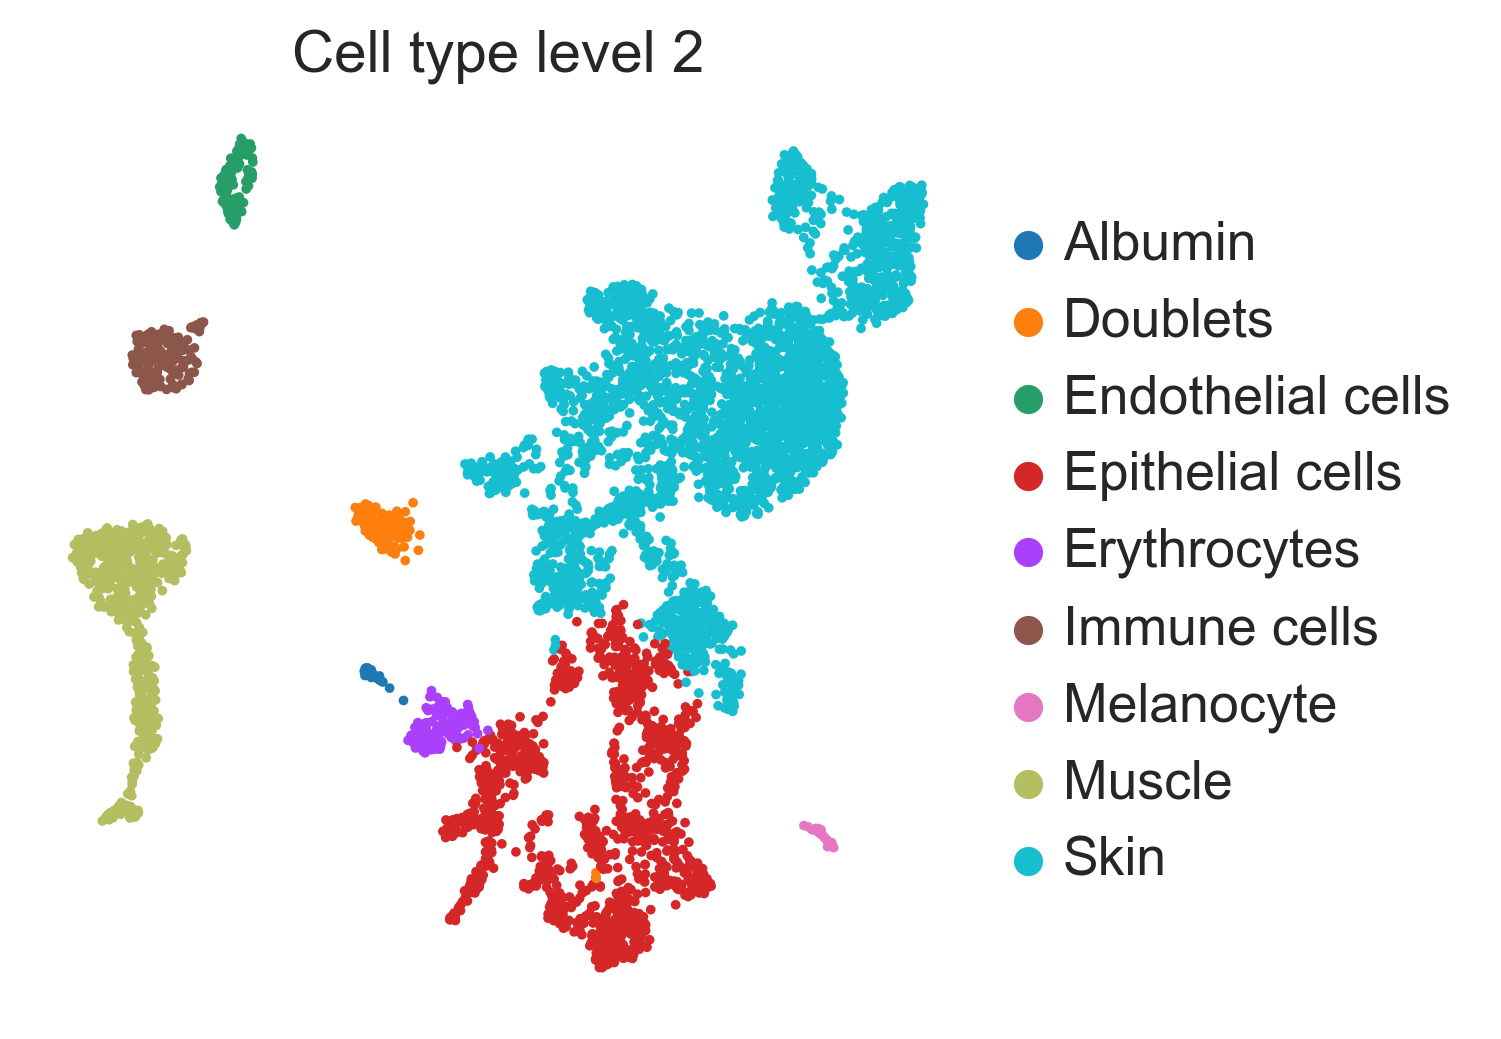

In [9]:
adata.obs["celltype_l2"] = [ct2_dict[leiden] for leiden in adata.obs["leiden_0.5"]]
sc.pl.umap(adata, color="celltype_l2", title="Cell type level 2", frameon=False)

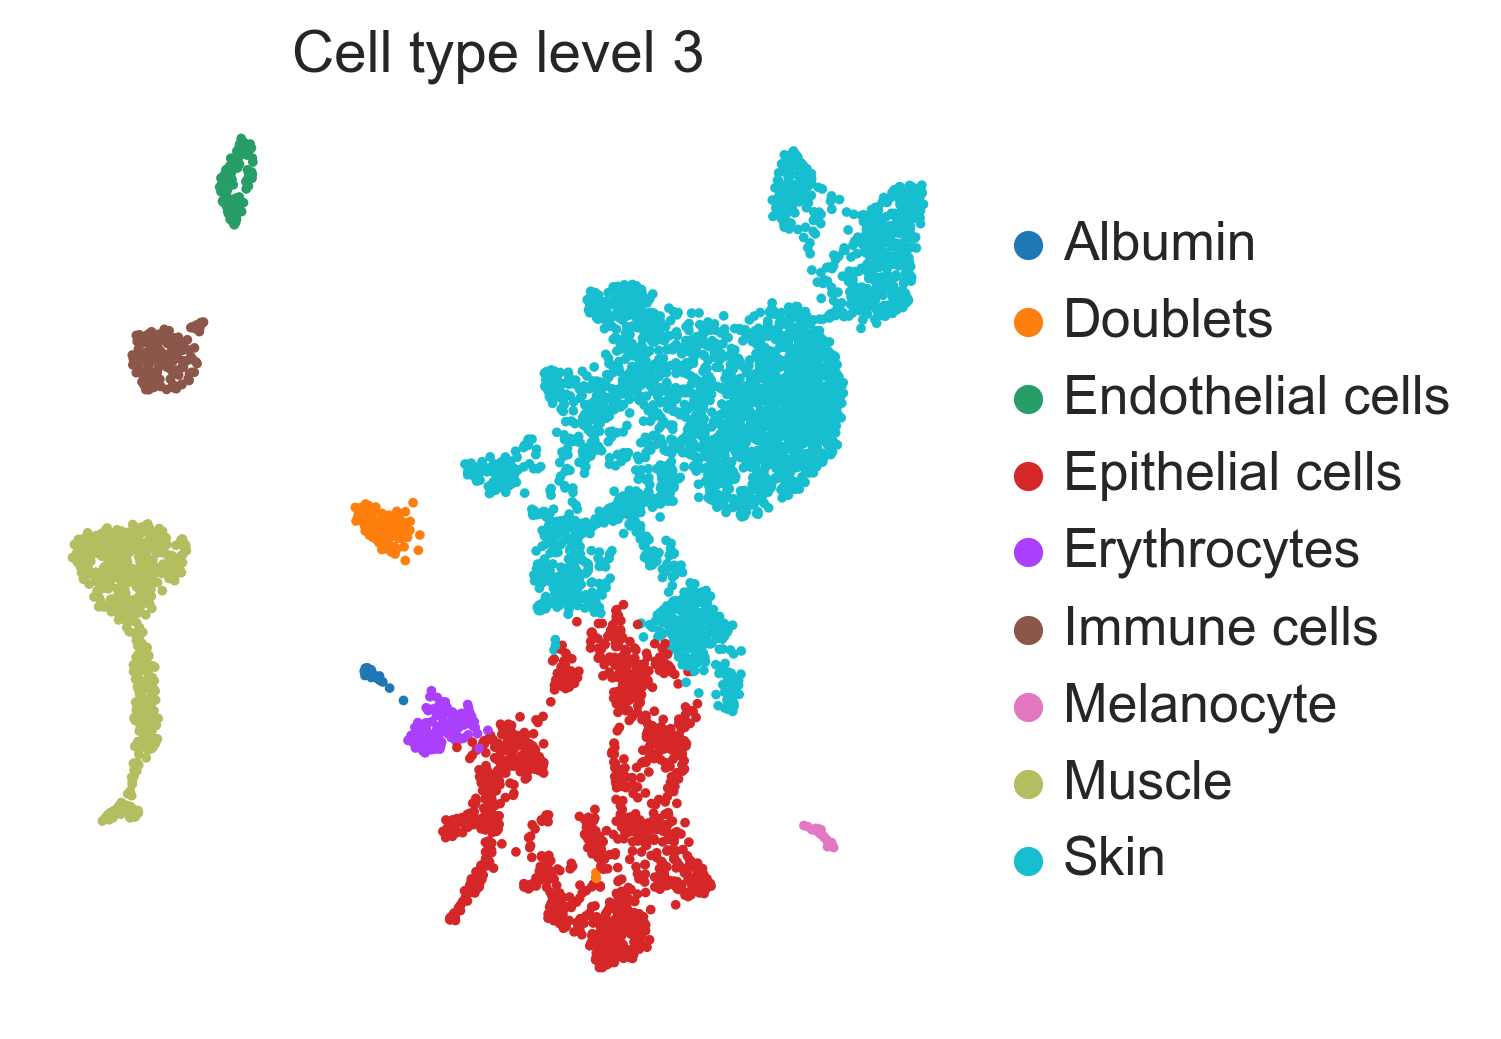

In [10]:
adata.obs["celltype_l3"] = [ct2_dict[leiden] for leiden in adata.obs["leiden_0.5"]]
sc.pl.umap(adata, color="celltype_l3", title="Cell type level 3", frameon=False)

In [11]:
adata.raw.to_adata().write_h5ad(f"{DATA_PATH}/cellxgene/other_cells_face_E13.h5ad")
adata.write_h5ad(f"{DATA_PATH}/anndatas/other_cells_face_E13_reference.h5ad")